In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from utils import Element 
import warnings
import cognitive_functions as cf
warnings.filterwarnings('ignore')

In [3]:
train_1 = {a,b,c,d}
train_2 = {a,b,e,f}
test_1 = {c,d,e,f}
test_2 = {a,b,c,d,e,f}
test_3 = {g,h,i,j}
test_4 = {g,h,k,l}
test_5 = {i,j,k,l}
test_6 = {g,h,i,j,k,l}

### Experiment 1: Sequence Generation

In [4]:
from simulation import StringGenerator, plot_simulation

In [5]:
# Simulation

set1 = [
    {'a','b','c','d'},
    {'c','d','e','f'},
    {'e','f','a','b'}
]

sg = StringGenerator(symbol_sets=set1, len_seq=4)
round1 = sg.Round(sg)

In [6]:
sim1 = sg.Simulator(sg)

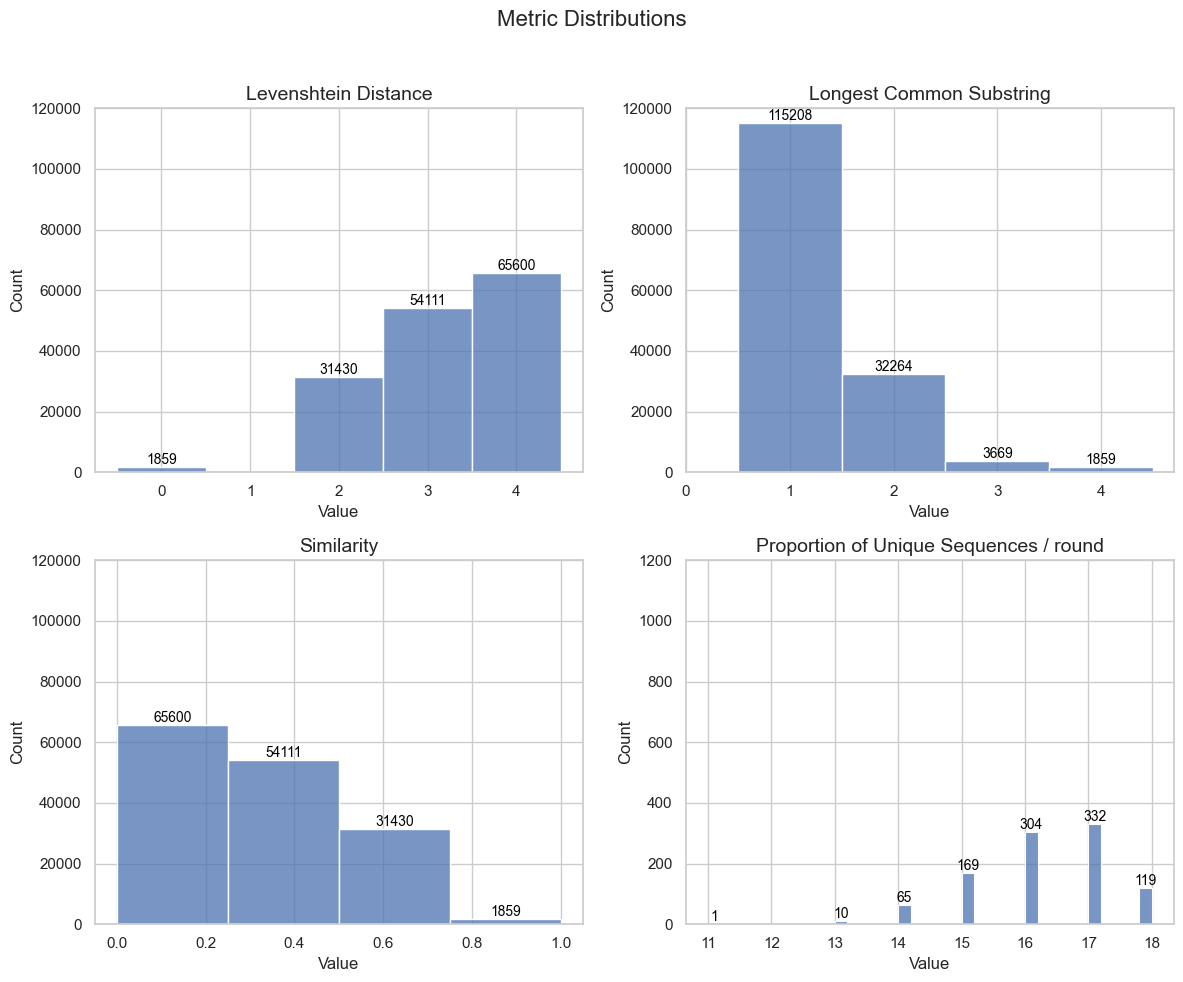

In [7]:
plot_simulation(sim1.metrics())

In [8]:
# Simulation

set2 = [
    {'a','b','c','d','e','f'},
]

sg = StringGenerator(symbol_sets=set2, len_seq=6)
simulator = sg.Simulator(sg, n_seq=18)

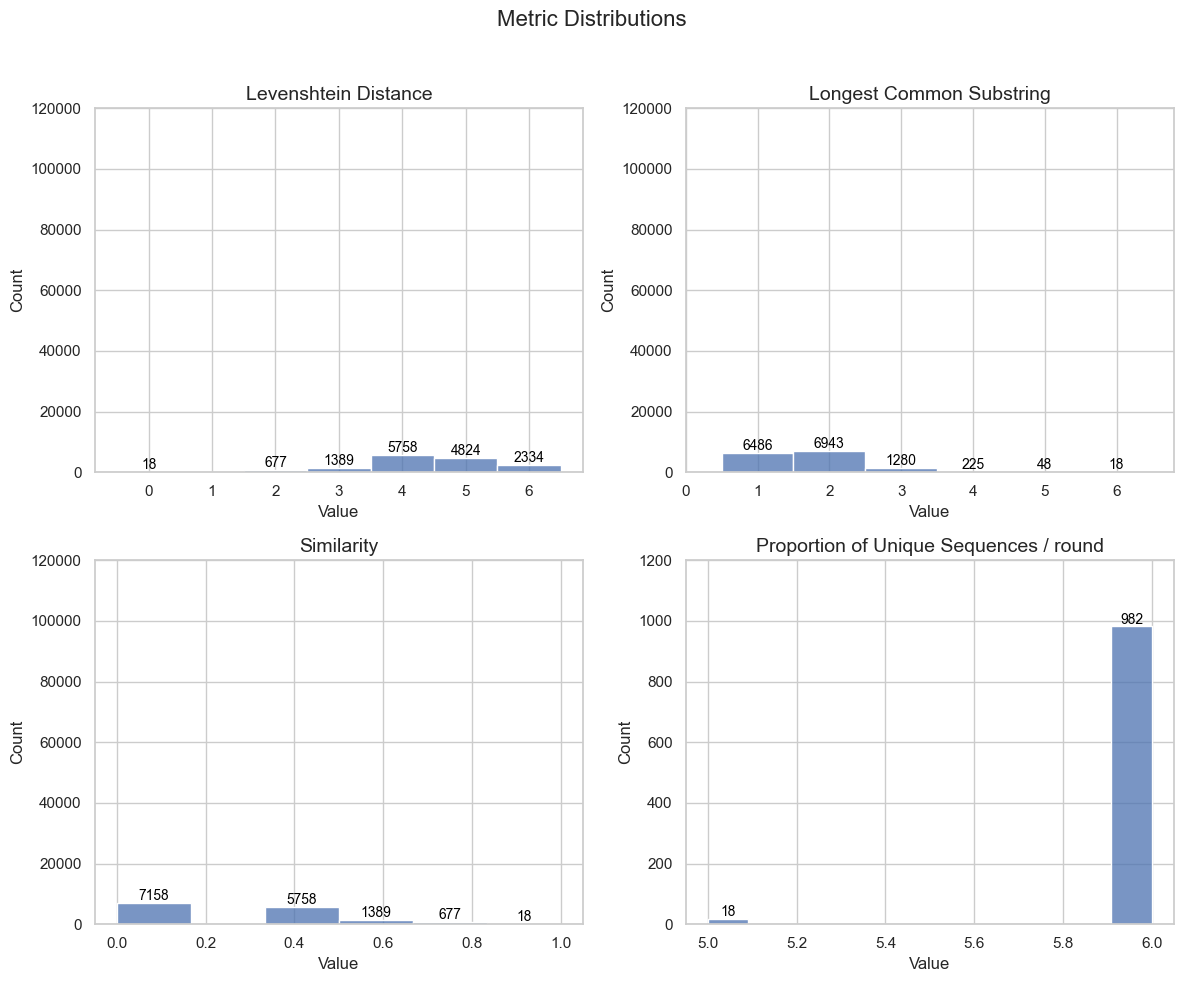

In [9]:
plot_simulation(simulator.metrics())

### Experiment 2: Sequence Reordering

Given a set of 2-dimensional elements, we want to reorder the elements in such a way that it follows each of the listed cognitive functions. We're going to time every primitive fucntion and run a simulation of the reordering process.

In [ ]:
def runReordering(element_set, n_runs):
    times = []
    for _ in range(n_runs):
        time_list = []
        # 1-D
        time_list.append(cf.iterate(element_set)[1])
        time_list.append(cf.palindrome(element_set)[1])
        time_list.append(cf.alternate(element_set)[1])
        # time_list.append(cf.seriate(element_set)[1])
        # 2-D
        time_list.append(cf.serial_crossed(element_set)[1])
        time_list.append(cf.center_embedded(element_set)[1])
        time_list.append(cf.tail_recursive(element_set)[1]) 

        times.append(time_list)
        
    times = np.array(times)
        
    return (times)


In [12]:
times = runReordering(train_1, 10)

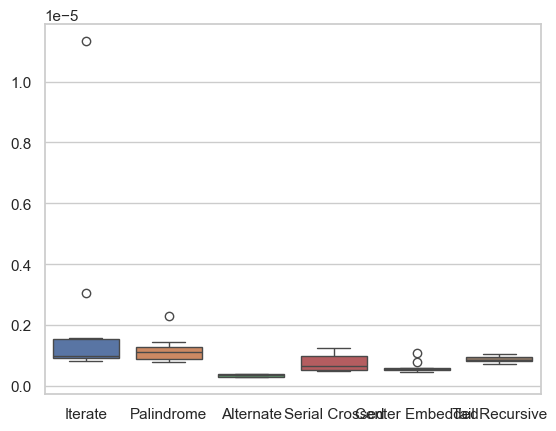

In [ ]:
df = pd.DataFrame(times, columns=['Iterate', 'Palindrome', 'Alternate', 'Serial Crossed', 'Center Embedded', 'Tail Recursive'])
sns.boxplot(data=df)
plt.title('Reordering Times for Cognitive Functions')
plt.xlabel('Cognitive Functions')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()  

In [14]:
# get averages
print(df.mean())   

Iterate            2.300000e-06
Palindrome         1.191600e-06
Alternate          3.376990e-07
Serial Crossed     7.584014e-07
Center Embedded    6.084010e-07
Tail Recursive     8.796989e-07
dtype: float64
